In [1]:
import numpy as np
import matplotlib.pyplot as plt

La idea va a ser limpiar datos como antes, pero usando los algoritmos fft de numpy

Text(0, 0.5, 'La señal x(t)')

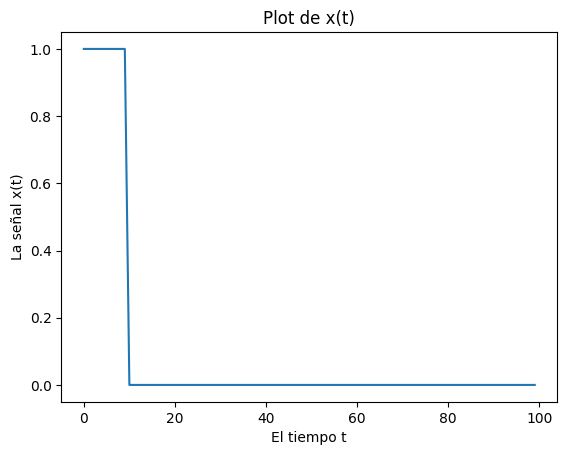

In [2]:
nt=100
xt=np.zeros(nt)
xt[:10]=1
plt.plot(xt)
plt.title("Plot de x(t)")
plt.xlabel("El tiempo t")
plt.ylabel("La señal x(t)")

Este algoritmo me da la transformada de Fourier discreta

Text(0.5, 1.0, 'La parte imaginaria de f(x(t))')

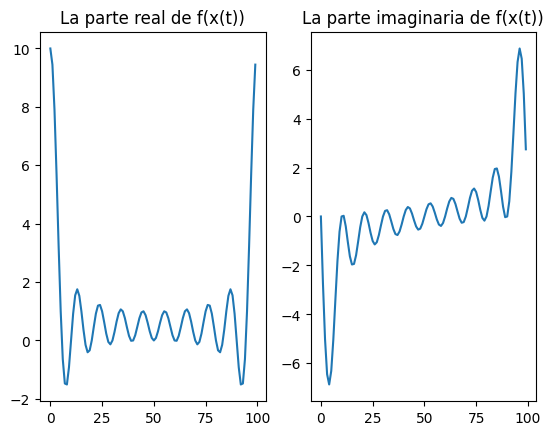

In [3]:
fxt=np.fft.fft(xt)
plt.subplot(1,2,1)
plt.plot(np.real(fxt))
plt.title("La parte real de f(x(t))")
plt.subplot(1,2,2)
plt.plot(np.imag(fxt))
plt.title("La parte imaginaria de f(x(t))")

fftshift me permite visualizar las frecuencias como vieron en la teórica, es decir, te permuta del medio para atrás

Text(0.5, 1.0, 'La parte imaginaria de f(x(t))')

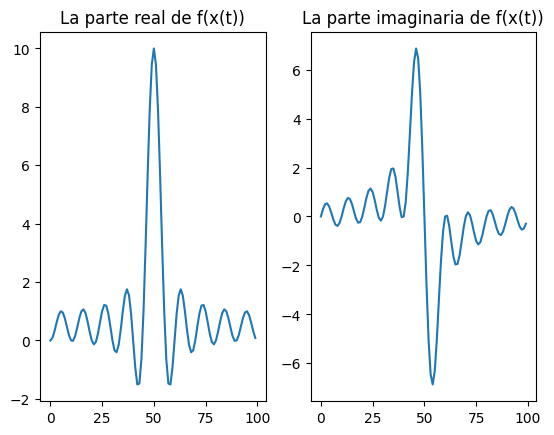

In [4]:
fxt=np.fft.fft(xt)
plt.subplot(1,2,1)
plt.plot(np.fft.fftshift(np.real(fxt)))
plt.title("La parte real de f(x(t))")
plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(np.imag(fxt)))
plt.title("La parte imaginaria de f(x(t))")

Text(0, 0.5, 'La señal x2(t)')

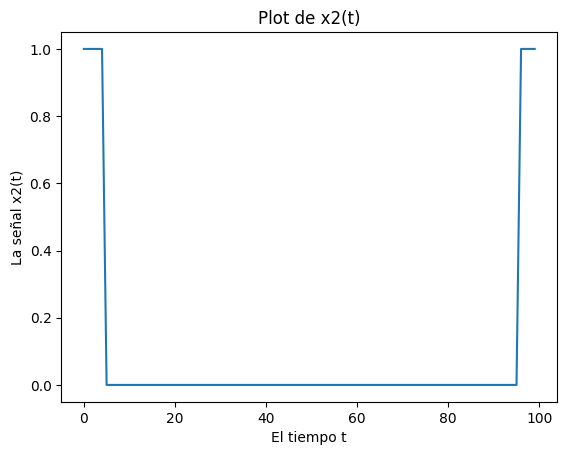

In [5]:
nt=100
x2t=np.zeros(nt)
x2t[:5]=1
x2t[-4:]=1
plt.plot(x2t)
plt.title("Plot de x2(t)")
plt.xlabel("El tiempo t")
plt.ylabel("La señal x2(t)")

Probemos limpiar una señal con ruido

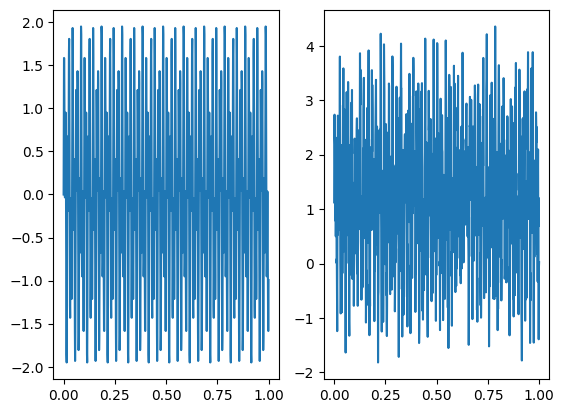

In [6]:
dt=0.001
t=np.arange(0,1, dt)
#N=1/dt=1000
#frecuencia de sampleo = 1/delta = 1000Hz
#Nyquist = 1000/2 = 500
f=np.sin(2*np.pi*50*t)+np.sin(2*np.pi*120*t)
#w = 2 * pi * 120
#f =w / 2*pi
fs=f+2.5*np.random.rand(len(t))
plt.subplot(1, 2, 1)
plt.plot(t, f)
plt.subplot(1,2,2)
plt.plot(t, fs)

Miremos el power spectrum

In [7]:
n=len(t)
fhat=np.fft.fft(fs, n)
ps=fhat*np.conj(fhat)/n
freq=(np.arange(n))/(n*dt)
L=np.arange(1, np.floor(n), dtype=int)



/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 0.2)

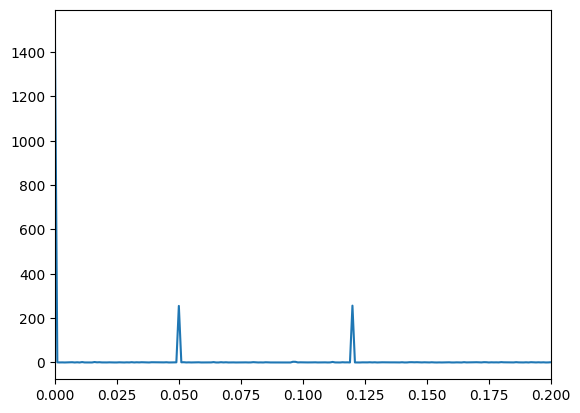

In [10]:
plt.plot(t, ps)
plt.xlim(0,0.2)

Para filtrar frecuencias, en este contexto, se filtra el power spectrum con el siguiente algoritmo. Vamos a filtrar lo que contribuye con menos de 100 al power spectrum. La instrucciòn ifft es la que da la transformada inversa.

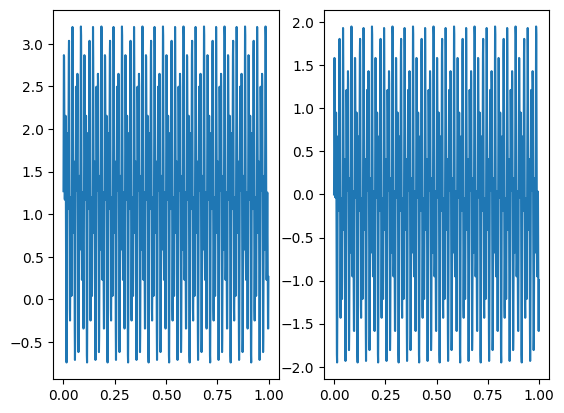

In [9]:
indices=ps>100
pslimpio=ps*indices

fhat=indices*fhat
ffilt=np.fft.ifft(fhat)
plt.subplot(1,2,1)
plt.plot(t, ffilt)
plt.subplot(1,2,2)
plt.plot(t, f)

Quedó bastante bien limpiada.